In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

## loading the data

In [2]:
uploaded=files.upload()

Saving Unemployment in India.csv to Unemployment in India.csv


In [6]:
df=pd.read_csv(io.BytesIO(uploaded["Unemployment in India.csv"]))
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## undestanding about the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


## summary statistics

In [9]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [10]:
#shape of the data
df.shape

(768, 7)

In [12]:
# datatypes of the columns
df.dtypes

,0
Region,object
Date,object
Frequency,object
Estimated Unemployment Rate (%),float64
Estimated Employed,float64
Estimated Labour Participation Rate (%),float64
Area,object


## Data cleaning

In [42]:
# Standardize column name
df.columns=df.columns.str.strip().str.lower()
cols=df.columns

In [37]:
# Convert date to datetime
df['date']=pd.to_datetime(df['date'])


,region,date,frequency,estimated unemployment rate (%),estimated employed,estimated labour participation rate (%),area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


In [38]:
# Check for missing values
print(df.isnull().sum())

region                                     28
date                                       28
frequency                                  28
estimated unemployment rate (%)            28
estimated employed                         28
estimated labour participation rate (%)    28
area                                       28
dtype: int64


In [41]:
# Drop  missing values
df = df.dropna()



## Data Exploration

In [43]:
for col in cols:
  print(df[col].value_counts())

region
Andhra Pradesh      28
Bihar               28
Chhattisgarh        28
Delhi               28
Karnataka           28
Gujarat             28
Haryana             28
Himachal Pradesh    28
Jharkhand           28
Maharashtra         28
Madhya Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Odisha              28
Rajasthan           28
Punjab              28
Telangana           28
Tamil Nadu          28
Uttarakhand         27
Meghalaya           27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64
date
2019-10-31    55
2019-11-30    55
2019-06-30    54
2019-07-31    54
2019-05-31    54
2019-08-31    53
2020-01-31    53
2019-12-31    53
2020-02-29    53
2019-09-30    52
2020-03-31    52
2020-04-30    51
2020-05-31    51
2020-06-30    50
Name: count, dtype: int64
frequency
Monthly     381
 Monthly    359
Name: count,

In [45]:
for col in cols:
  print(df[col].unique())

['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'Chandigarh']
<DatetimeArray>
['2019-05-31 00:00:00', '2019-06-30 00:00:00', '2019-07-31 00:00:00',
 '2019-08-31 00:00:00', '2019-09-30 00:00:00', '2019-10-31 00:00:00',
 '2019-11-30 00:00:00', '2019-12-31 00:00:00', '2020-01-31 00:00:00',
 '2020-02-29 00:00:00', '2020-03-31 00:00:00', '2020-04-30 00:00:00',
 '2020-05-31 00:00:00', '2020-06-30 00:00:00']
Length: 14, dtype: datetime64[ns]
[' Monthly' 'Monthly']
[ 3.65  3.05  3.75  3.32  5.17  3.52  4.12  4.38  4.84  5.91  4.06 16.29
 14.46  0.85  4.29  5.08  4.26  5.79  4.46  4.65  4.66  3.26  3.77  9.38
  0.    9.27 10.2  13.44 11.    8.87 12.47 12.4  10.16  9.13  9.61 15.39
 45.09 47.26 20.49  9.82  6.76  4.54

In [47]:
print(df.duplicated().sum())

0


## Data Visualization

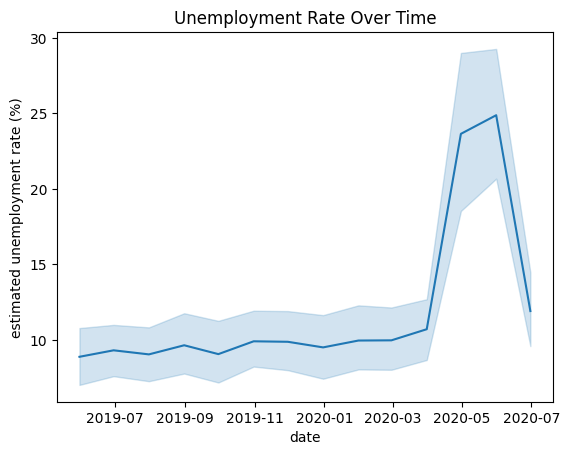

In [53]:
# line plot plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='estimated unemployment rate (%)')
plt.title('Unemployment Rate Over Time')
plt.ylabel('estimated unemployment rate (%)')
plt.xlabel('date')
plt.show()


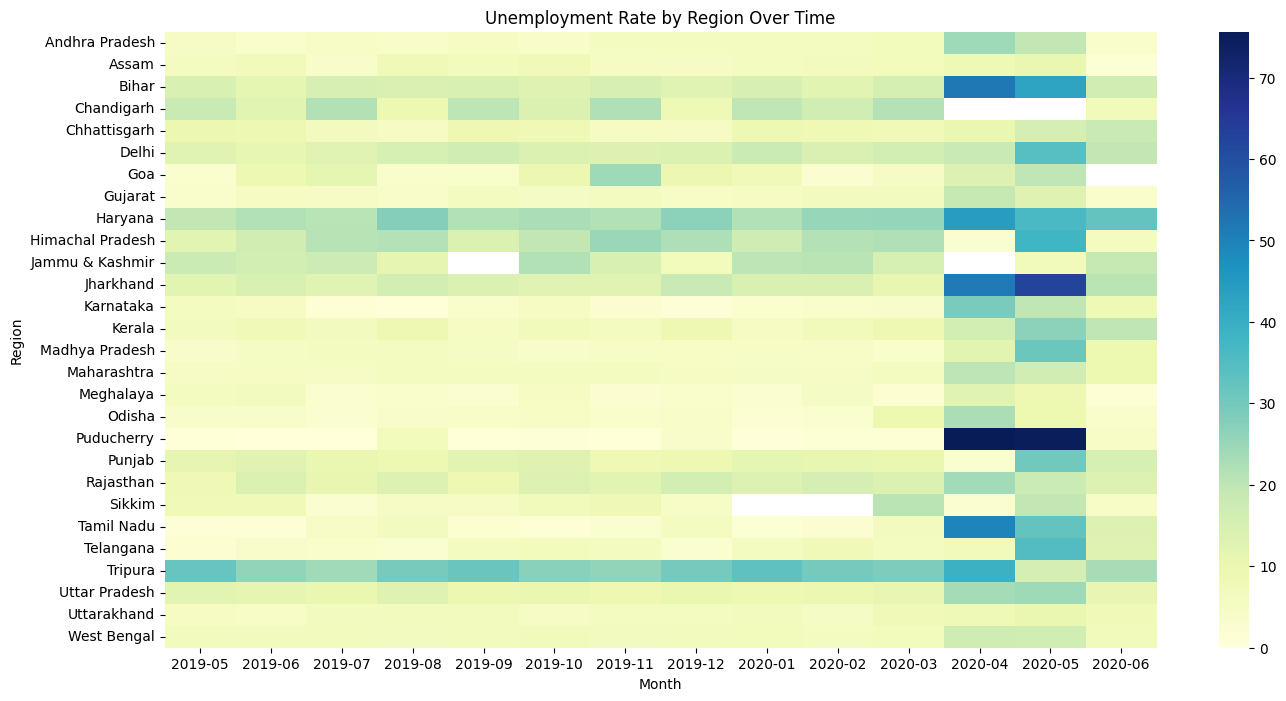

In [55]:
# Regional Heatmap:
# Pivot for heatmap
heatmap_data = df.pivot_table(index='region', columns=df['date'].dt.to_period("M"), values='estimated unemployment rate (%)')

plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title('Unemployment Rate by Region Over Time')
plt.xlabel('Month')
plt.ylabel('Region')
plt.show()



## Analyze COVID-19 Impact

In [57]:
# Create a flag column
df['is_covid_period'] = df['date'] >= '2020-03-01'

# Compare pre and post COVID
pre_covid = df[df['date'] < '2020-03-01']
post_covid = df[df['date'] >= '2020-03-01']

print("Pre-COVID Avg:", pre_covid['estimated unemployment rate (%)'].mean())
print("Post-COVID Avg:", post_covid['estimated unemployment rate (%)'].mean())
df


Pre-COVID Avg: 9.509533582089553
Post-COVID Avg: 17.774362745098042


,region,date,frequency,estimated unemployment rate (%),estimated employed,estimated labour participation rate (%),area,is_covid_period
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,False
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,False
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,False
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,False
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,False
...,...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,False
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,True
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,True
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,True


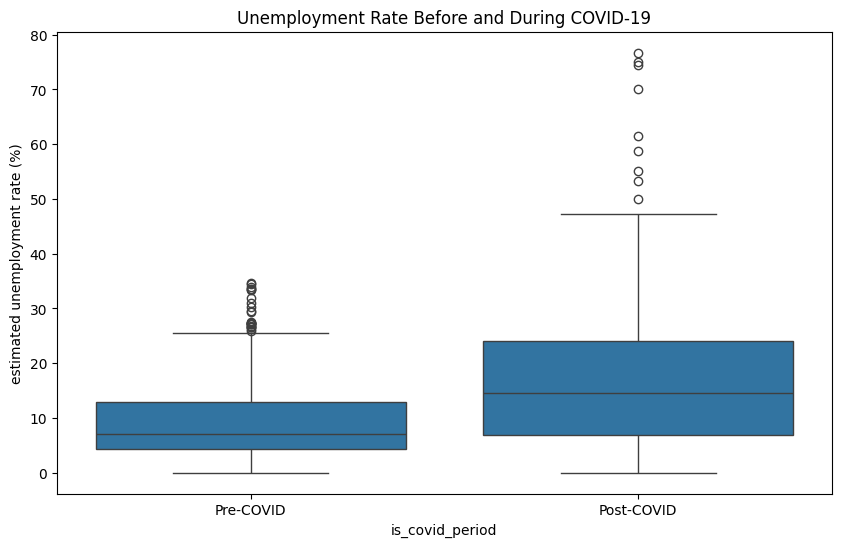

In [59]:
# Visual Comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_covid_period', y='estimated unemployment rate (%)', data=df)
plt.title('Unemployment Rate Before and During COVID-19')
plt.xticks([0, 1], ['Pre-COVID', 'Post-COVID'])
plt.show()


## Identify Patterns or Seasonality

In [60]:
# Extract Month & Year:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year


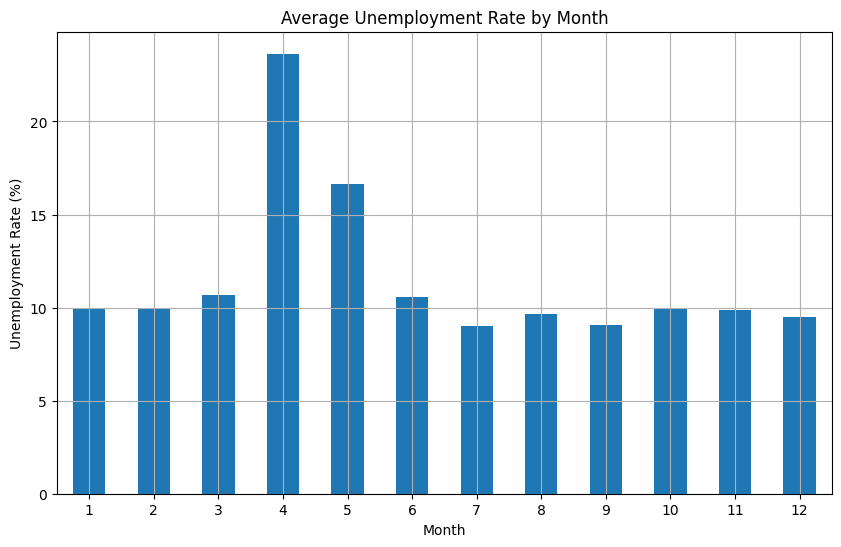

In [63]:
# Monthly Average (Seasonality)
monthly_seasonality = df.groupby('month')['estimated unemployment rate (%)'].mean()

plt.figure(figsize=(10, 6))
monthly_seasonality.plot(kind='bar')
plt.title('Average Unemployment Rate by Month')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()
